# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats
import warnings

In [2]:
data = pd.read_csv('data/human_body_temperature.csv')

In [3]:
data.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


We can see that there are 130 entries, which satisfies the Central Limit Theorem condition of having more than 30 samples.

In [5]:
bt_distrib = data.groupby("temperature").size().reset_index(name='Count')
bt_distrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
temperature    34 non-null float64
Count          34 non-null int64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [6]:
#Calculate mean and standard deviation
temperature_mean = np.mean(data.temperature) 
temperature_std = np.std(data.temperature)

C:\Users\AlanPC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


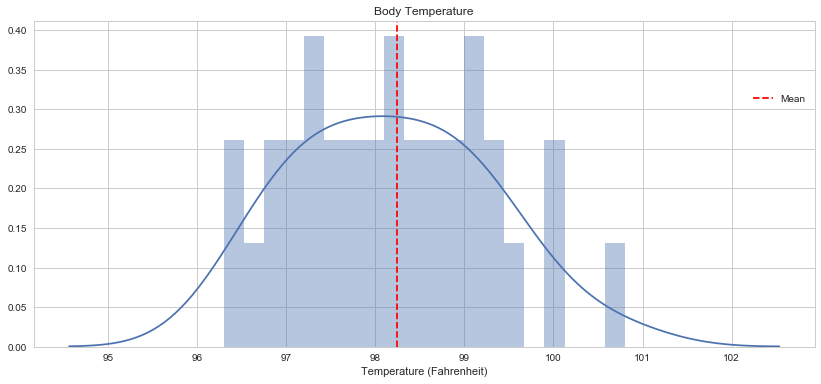

In [7]:
#Visualize the human body temperature graph
sns.set(style="whitegrid")
plt.figure(figsize=(14,6)) #Set figure 14 inches wide, 6 inches high
ax = sns.distplot(bt_distrib.temperature, bins=20) #Warning here
plt.axvline(temperature_mean, color='r', linestyle='--')
plt.legend(["Mean"],bbox_to_anchor=(1,.8))
plt.xlabel("Temperature (Fahrenheit)")
ax.set_title('Body Temperature')
warnings.filterwarnings('ignore', category = PendingDeprecationWarning) #Seaborn uses a deprecated function

In [9]:
#Conduct normality test to see if graph is normal
norm_test = stats.mstats.normaltest(data.temperature)
print("Z stat is {0:1.3f} and p-value is {1:1.3f}".format(norm_test.statistic, norm_test.pvalue))

Z stat is 2.704 and p-value is 0.259


From the graph above we can see that it visually looks like a normal distribution

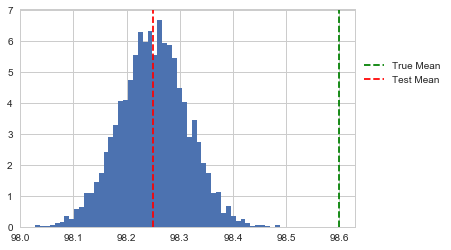

In [10]:
#Use sample bootstrap hypothesis test to see if true population mean is really 98.6 F t
#Boot strap replicate 
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        # Applies function on a random set of data points
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

#Generate boot strap replicas of the mean true population
bs_replicates = draw_bs_reps(data.temperature, np.mean, 5000)
#Construct histogram of results
plt.hist(bs_replicates, bins=50, density=True)
#Plot mean line
bs_replicate_mean = np.mean(bs_replicates)
plt.axvline(98.6, color='g', linestyle='--')
plt.axvline(temperature_mean, color='r', linestyle='--')
plt.legend(["True Mean","Test Mean"],bbox_to_anchor=(1,.8))
# Show the plot
plt.show()

In [11]:
#Measure the bootstrap confidence intervals
conf_int = np.percentile(bs_replicates, [2.5,97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12384615 98.37232692]


From the bootstrap hypothesis test, we have a 95% confidence interval that the true population mean is somewhere between 97.84 and 98.55, visually it is unlikely that it is 98.6F. 

In [12]:
#Use t statistics to see if the true population mean is really 98.6 F
u = 98.6 #Population mean null hypothesis
t_val , p_val = stats.ttest_1samp(data.temperature, u)
print("T stat is {0:1.3f} and p-value is {1:1.8f}".format(t_val, p_val))

T stat is -5.455 and p-value is 0.00000024


In [13]:
#Use Z statistics to see if the true population mean is really 98.6 F
n = len(data.temperature)
se = temperature_std / np.sqrt(n)

z_val = (temperature_mean - u)/se
p_val = stats.norm.sf(np.abs(z_val)) * 2
print("Z stat is {0:1.3f} and p-value is {1:1.8f}".format(z_val, p_val))

Z stat is -5.476 and p-value is 0.00000004


In [14]:
#We will draw a smaller sample to see which test is better
sample_test = np.random.choice(data.temperature, 10)

#First is the T test
t_val , p_val = stats.ttest_1samp(sample_test, u)
print("T stat is {0:1.3f} and p-value is {1:1.8f}".format(t_val, p_val))

#Next is z test again
n = len(sample_test)
sample_std = np.std(sample_test)
sample_mean = np.mean(sample_test)
se = sample_std / np.sqrt(n)

z_val = (sample_mean - u)/se
p_val = stats.norm.sf(np.abs(z_val)) * 2
print("Z stat is {0:1.3f} and p-value is {1:1.8f}".format(z_val, p_val))

T stat is -2.060 and p-value is 0.06950437
Z stat is -2.171 and p-value is 0.02991578


C:\Users\AlanPC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


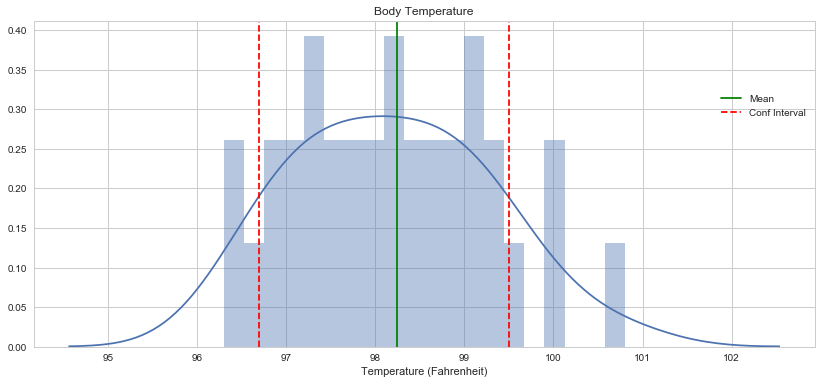

In [15]:
#Abnormal temperature ranges within a 95% confidence interval

#Create a confidence interval using bootstrap method
bs_sample = np.random.choice(data.temperature, size=len(data.temperature))
bs_conf_int = np.percentile(bs_sample,[2.5,97.5])

sns.set(style="whitegrid")
plt.figure(figsize=(14,6)) #Set figure 14 inches wide, 6 inches high
ax = sns.distplot(bt_distrib.temperature, bins=20) #Warning here
plt.axvline(temperature_mean, color='g')
plt.axvline(bs_conf_int[0], color='r', linestyle='--')
plt.axvline(bs_conf_int[1], color='r', linestyle='--')
plt.legend(["Mean","Conf Interval"],bbox_to_anchor=(1,.8))
plt.xlabel("Temperature (Fahrenheit)")
ax.set_title('Body Temperature')
warnings.filterwarnings('ignore', category = PendingDeprecationWarning) #Seaborn uses a deprecated function

In [16]:
#Now we will explore the difference between male and female body temperatures
gender = data.groupby('gender')
gender.describe().temperature

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
M,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


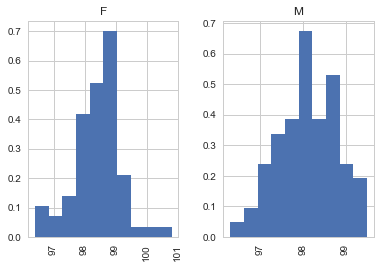

In [17]:
#Show histograms for males and females
_ = data.temperature.hist(by=data['gender'], density=True)

We shall test this using a t test to see if the null hypothesis (There is no difference between male and female temperatures) is true.

In [18]:
#Calculate t test between female and male
female_temperature = gender.get_group('M').temperature
male_temperature = gender.get_group('F').temperature

stats.ttest_ind(male_temperature, female_temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The null hypothesis was that there was no difference between male and female body temperatures. However because the p value is small we reject the null hypothesis and conclude that there is a difference between the two variables.